In [26]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

#LOAD ALL IMAGES FROM THE DATA FILE
imageList = tf.data.Dataset.list_files(os.path.join('data', '*.png'), 
                                   shuffle = False)
#DONT SHUFFLE TO LINE UP WITH THE TEXT FILES

#LOAD IN ALL THE TEXT FILES
#textList = tf.data.Dataset.list_files(os.path.join('data', '*.txt'), 
#                                   shuffle = False)

#prints all images
#for x in imageList.as_numpy_iterator():
#   print(x)
#for x in textList.as_numpy_iterator():
    #print(x)

In [27]:
def preprocess(filepath):
    # this is the function that will process all the images that are in the image list for basic conversion

    #read image
    img = tf.io.read_file(filepath)
    #load image
    img = tf.io.decode_png(img, channels=3)
    #scaled the image to be 0-1
    img = img / 255

    #img = tf.image.central_crop(image=img, central_fraction=0.5)

    #img = tf.image.rgb_to_grayscale(img)


    return img


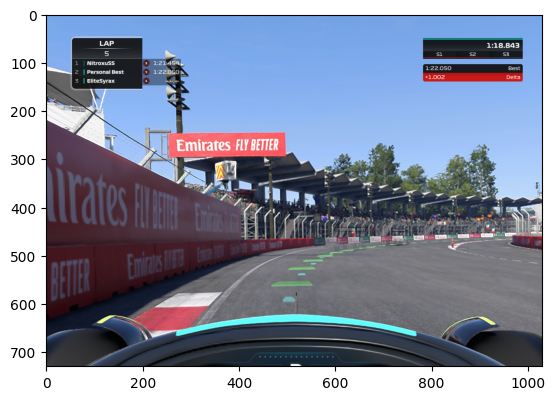

In [28]:
imageList = imageList.map(preprocess)
plt.imshow(imageList.as_numpy_iterator().next(), cmap='gray')

# BRIUNGING IN THE TEXT NOW

In [29]:
def preprocess_text(filepath):

    key = tf.io.read_file(filepath)

    if key == 'up arrow\r\n':
        return [1,0,0,0]
    if key == 'down arrow\r\n':
        return [0,1,0,0]
    if key == 'left arrow\r\n':
        return [1,0,0,0]
    if key == 'right arrow\r\n':
        return [0,0,0,1]
    if key == 'left arrow,up arrow\r\n':
        return [1,0,1,0]
    if key == 'left arrow,down arrow\r\n':
        return [0,1,1,0]
    if key == 'right arrow,up arrow\r\n':
        return [1,0,0,1]
    if key == 'right arrow,down arrow\r\n':
        return [0,1,0,1]
    else:
        print(key)
        return [0,0,0,0]
    return key 

In [30]:
def wrap_array(x1,x2,x3,x4):
    return tf.expand_dims([x1,x2,x3,x4], axis = 0)

In [31]:
textList = tf.data.Dataset.list_files(os.path.join('data', '*.txt'), 
                                   shuffle = False)
textList = textList.map(lambda x: tf.py_function(preprocess_text, [x], ([tf.int16, tf.int16, tf.int16, tf.int16,])))
textList = textList.map(wrap_array)

for x in textList.as_numpy_iterator():
    print(x)

[[1 0 0 0]]
[[1 0 0 1]]
[[1 0 0 1]]
[[1 0 0 1]]
[[1 0 0 1]]
[[1 0 0 1]]
[[1 0 0 1]]
[[1 0 0 0]]
[[1 0 0 1]]
[[1 0 0 1]]
[[1 0 0 1]]
[[1 0 0 0]]
[[1 0 0 1]]
[[1 0 0 1]]
[[1 0 0 1]]
[[1 0 0 0]]
[[1 0 0 1]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 1]]
[[1 0 0 0]]
[[1 0 0 1]]
[[1 0 0 1]]
[[1 0 0 0]]
[[1 0 1 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 1 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 1 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 1 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 1 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 1]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 1 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 1]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
[[1 0 0 0]]
tf.Tensor(b'down arrow,up arrow\r\n', sh

In [32]:
def unwrap(x, y):
    return x, tf.squeeze(y)

In [33]:
dataset = tf.data.Dataset.zip((imageList, textList))
x, y = dataset.as_numpy_iterator().next()
len(dataset)
dataset = dataset.cache()
dataset = dataset.shuffle(40)
dataset = dataset.batch(8)
dataset = dataset.prefetch(4)
dataset = dataset.map(unwrap)


len(dataset)
x, y = dataset.as_numpy_iterator().next()

print(len(x))
print(len(y))
print(x)



8
8
[[[[0.14117648 0.16078432 0.22745098]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.14117648 0.16078432 0.22745098]
   [0.27450982 0.28627452 0.31764707]
   [0.2784314  0.2901961  0.32156864]
   ...
   [0.50980395 0.6745098  0.9372549 ]
   [0.5058824  0.6784314  0.94509804]
   [0.50980395 0.6745098  0.94509804]]

  [[0.14117648 0.16470589 0.22745098]
   [0.27450982 0.28235295 0.31764707]
   [0.27450982 0.28235295 0.32156864]
   ...
   [0.50980395 0.6745098  0.9372549 ]
   [0.50980395 0.6745098  0.9372549 ]
   [0.50980395 0.6745098  0.9372549 ]]

  ...

  [[0.11764706 0.11764706 0.11764706]
   [0.16862746 0.1764706  0.2       ]
   [0.16862746 0.1764706  0.2       ]
   ...
   [0.2627451  0.2627451  0.27058825]
   [0.27058825 0.27058825 0.2784314 ]
   [0.27058825 0.27058825 0.2784314 ]]

  [[0.11764706 0.11764706 0.11764706]
   

# model


In [34]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Input

model = Sequential()

print(imageList.as_numpy_iterator().next().shape)

model.add(keras.Input(shape=((730, 1030, 3))))

model.add(Conv2D(64,  #filters
                  5,  #kernel size
                  strides = (3,3),   #reducing the compression so its not 400 million parameters lkmfaoooo
                activation = 'relu',  #activation type
                input_shape =((730, 1030, 3))))    #input shape (batch, shape as seen above)#

model.add(BatchNormalization())

model.add(MaxPooling2D())

model.add(Conv2D(128, 4, 
                 strides = (3,3),
                   activation='relu'))

model.add(BatchNormalization())


model.add(Conv2D(128, 3, 
                 strides = (3,3),
                   activation='relu'))


model.add(BatchNormalization())

model.add(Conv2D(256, 2, 
                 strides = (3,3),
                   activation='relu'))


model.add(BatchNormalization())



model.add(GlobalAveragePooling2D())

model.add(Flatten())

model.add(Dense(4, activation='softmax'))

(730, 1030, 3)


In [35]:
model.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 242, 342, 64)      4864      
                                                                 
 batch_normalization_18 (Bat  (None, 242, 342, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 121, 171, 64)     0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 40, 56, 128)       131200    
                                                                 
 batch_normalization_19 (Bat  (None, 40, 56, 128)      512       
 chNormalization)                                                
                                                      

In [36]:
model.compile('adam', tf.losses.CategoricalCrossentropy())

model.fit(x, y, epochs = 500)

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 2.4114
Epoch 2/500
1/1 [==============================] - 1s 599ms/step - loss: 2.2673
Epoch 3/500
1/1 [==============================] - 1s 589ms/step - loss: 2.1689
Epoch 4/500
1/1 [==============================] - 1s 571ms/step - loss: 2.2647
Epoch 5/500
1/1 [==============================] - 1s 571ms/step - loss: 2.3513
Epoch 6/500
1/1 [==============================] - 1s 558ms/step - loss: 2.3734
Epoch 7/500
1/1 [==============================] - 1s 600ms/step - loss: 2.4172
Epoch 8/500
1/1 [==============================] - 1s 586ms/step - loss: 2.4352
Epoch 9/500
1/1 [==============================] - 1s 612ms/step - loss: 2.4340
Epoch 10/500
1/1 [==============================] - 1s 622ms/step - loss: 2.4438
Epoch 11/500
1/1 [==============================] - 1s 609ms/step - loss: 2.4539
Epoch 12/500


KeyboardInterrupt: 